#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [63]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [64]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [65]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [66]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [67]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [68]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [69]:
model = Sequential()

In [70]:
#卷積層1

In [71]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [72]:
model.add(Dropout(rate=0.25))

In [73]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [74]:
#卷積層2與池化層2

In [75]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [76]:
model.add(Dropout(0.25))

In [77]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [78]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [79]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [80]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(256, activation='relu'))

In [81]:
model.add(Dense(10, activation='softmax'))

In [82]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [83]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [84]:
'''
作業:請分別選用 "MSE", "binary _crossentropy" 查看Train/test accurancy and loss rate
'''

loss_function = ['categorical_crossentropy', 'MSE', 'binary_crossentropy']

# model_cat = model_mse = model_bin = model
Model = []
train_history = []

#print(type(Model[i]))
for i in range(3):
    Model.append(model)
    Model[i].compile(loss=loss_function[i], optimizer='sgd', metrics=['accuracy'])
    train_history.append(Model[i].fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1))


Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 98s 3ms/step - loss: 2.2012 - acc: 0.1785 - val_loss: 2.0724 - val_acc: 0.2776
Epoch 2/12
37500/37500 [==============================] - 89s 2ms/step - loss: 1.9815 - acc: 0.2807 - val_loss: 1.9598 - val_acc: 0.3223
Epoch 3/12
37500/37500 [==============================] - 90s 2ms/step - loss: 1.8441 - acc: 0.3380 - val_loss: 1.8208 - val_acc: 0.3918
Epoch 4/12
37500/37500 [==============================] - 90s 2ms/step - loss: 1.7325 - acc: 0.3807 - val_loss: 1.7211 - val_acc: 0.4202
Epoch 5/12
37500/37500 [==============================] - 89s 2ms/step - loss: 1.6417 - acc: 0.4104 - val_loss: 1.6427 - val_acc: 0.4435
Epoch 6/12
37500/37500 [==============================] - 89s 2ms/step - loss: 1.5684 - acc: 0.4344 - val_loss: 1.5814 - val_acc: 0.4631
Epoch 7/12
37500/37500 [==============================] - 89s 2ms/step - loss: 1.5117 - acc: 0.4544 - val_loss: 1.5458 - val_acc

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_history, train_acc,test_acc, title):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

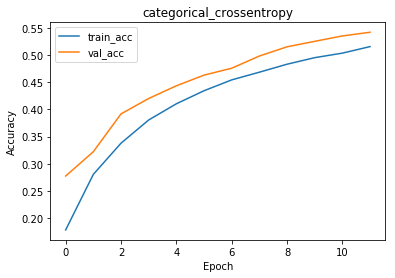

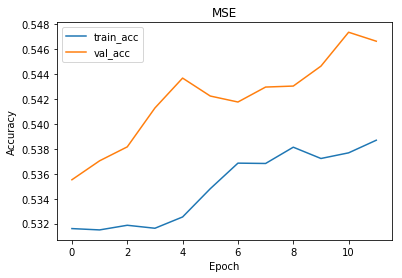

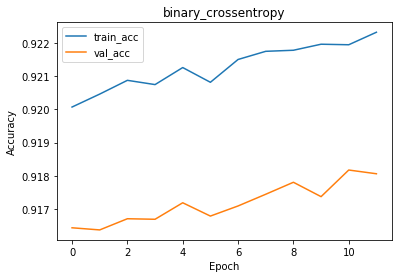

In [88]:
for i in range(len(Model)):
    show_train_history(train_history[i], 'acc','val_acc', loss_function[i])